## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA 
from sklearn.impute import SimpleImputer


/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Acquire Data

In [2]:
# Read the churn dataset into a dataframe as variable df.
df = pd.read_csv('churn_raw_data.csv')
df = pd.DataFrame(df)
# Quick look at the data.
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


## Gather insight

In [3]:
# Print information about the dataset.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [4]:
# Print statistical description of columns in the dataset. 
print(df.describe(include='all'))

         Unnamed: 0    CaseOrder Customer_id  \
count   10000.00000  10000.00000       10000   
unique          NaN          NaN       10000   
top             NaN          NaN     K409198   
freq            NaN          NaN           1   
mean     5000.50000   5000.50000         NaN   
std      2886.89568   2886.89568         NaN   
min         1.00000      1.00000         NaN   
25%      2500.75000   2500.75000         NaN   
50%      5000.50000   5000.50000         NaN   
75%      7500.25000   7500.25000         NaN   
max     10000.00000  10000.00000         NaN   

                                 Interaction     City  State      County  \
count                                  10000    10000  10000       10000   
unique                                 10000     6058     52        1620   
top     aa90260b-4141-4a24-8e36-b04ce1f4f77b  Houston     TX  Washington   
freq                                       1       34    603         111   
mean                                     Na

In [5]:
# Print the data type of each column.
print(df.dtypes)

Unnamed: 0                int64
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone   

In [6]:
# Print the sum of mising values in each column.
print(df.isnull().sum())

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [7]:
# Print the percentage of missing values for each column.
print(df.isnull().sum() / len(df) * 100)

Unnamed: 0               0.00
CaseOrder                0.00
Customer_id              0.00
Interaction              0.00
City                     0.00
State                    0.00
County                   0.00
Zip                      0.00
Lat                      0.00
Lng                      0.00
Population               0.00
Area                     0.00
Timezone                 0.00
Job                      0.00
Children                24.95
Age                     24.75
Education                0.00
Employment               0.00
Income                  24.90
Marital                  0.00
Gender                   0.00
Churn                    0.00
Outage_sec_perweek       0.00
Email                    0.00
Contacts                 0.00
Yearly_equip_failure     0.00
Techie                  24.77
Contract                 0.00
Port_modem               0.00
Tablet                   0.00
InternetService          0.00
Phone                   10.26
Multiple                 0.00
OnlineSecu

In [8]:
# Print the sum of duplicates in each column. 
print(df.duplicated().sum())

0


In [9]:
# Print unique values for categorical columns.
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Customer_id: ['K409198' 'S120509' 'K191035' ... 'I243405' 'I641617' 'T38070']
Unique values in Interaction: ['aa90260b-4141-4a24-8e36-b04ce1f4f77b'
 'fb76459f-c047-4a9d-8af9-e0f7d4ac2524'
 '344d114c-3736-4be5-98f7-c72c281e2d35' ...
 'e8307ddf-9a01-4fff-bc59-4742e03fd24f'
 '3775ccfc-0052-4107-81ae-9657f81ecdf3'
 '9de5fb6e-bd33-4995-aec8-f01d0172a499']
Unique values in City: ['Point Baker' 'West Branch' 'Yamhill' ... 'Haubstadt' 'West Kill'
 'Clarkesville']
Unique values in State: ['AK' 'MI' 'OR' 'CA' 'TX' 'GA' 'TN' 'OK' 'FL' 'OH' 'PA' 'PR' 'IA' 'ME'
 'IL' 'WI' 'NC' 'AL' 'NM' 'VT' 'MD' 'NY' 'WA' 'CT' 'NJ' 'DC' 'ND' 'LA'
 'NE' 'WV' 'AZ' 'MO' 'WY' 'MT' 'VA' 'KY' 'MN' 'KS' 'MA' 'IN' 'SC' 'NH'
 'DE' 'MS' 'ID' 'AR' 'SD' 'CO' 'HI' 'UT' 'RI' 'NV']
Unique values in County: ['Prince of Wales-Hyder' 'Ogemaw' 'Yamhill' ... 'Billings' 'Haralson'
 'Briscoe']
Unique values in Area: ['Urban' 'Suburban' 'Rural']
Unique values in Timezone: ['America/Sitka' 'America/Detroit' 'America/Los_

## Data Cleaning

In [10]:
# Dropped unused column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Change categorical columns to lowercase.
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()
print(df[col])

0        credit card (automatic)
1       bank transfer(automatic)
2        credit card (automatic)
3                   mailed check
4                   mailed check
                  ...           
9995            electronic check
9996            electronic check
9997    bank transfer(automatic)
9998     credit card (automatic)
9999            electronic check
Name: PaymentMethod, Length: 10000, dtype: object


In [11]:
# Create variable to hold dtype changes
data_type_corrections = {  
    'item1': 'str',
    'item2': 'str',
    'item3': 'str',
    'item4': 'str',
    'item5': 'str',
    'item6': 'str',
    'item7': 'str',
    'item8': 'str',
    'CaseOrder':'str',
    'Zip':'str'
   
}

# Change data types
for column, dtype in data_type_corrections.items():
    df[column] = df[column].astype(dtype)
    


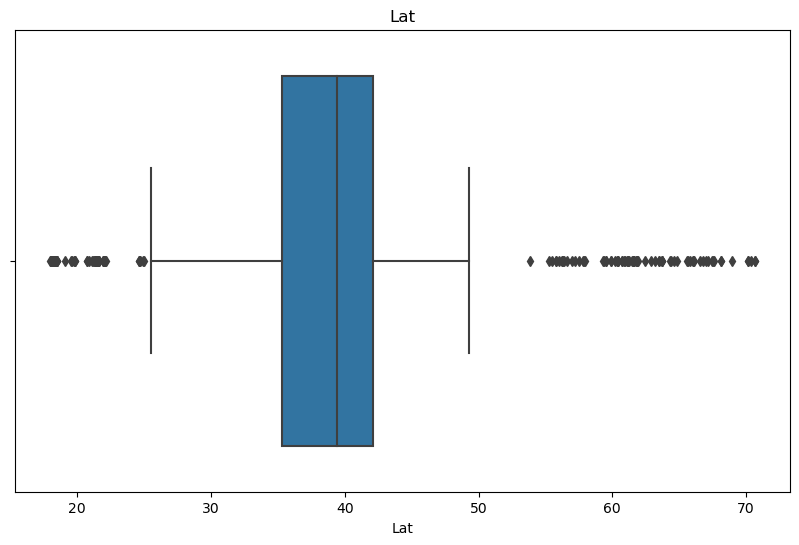

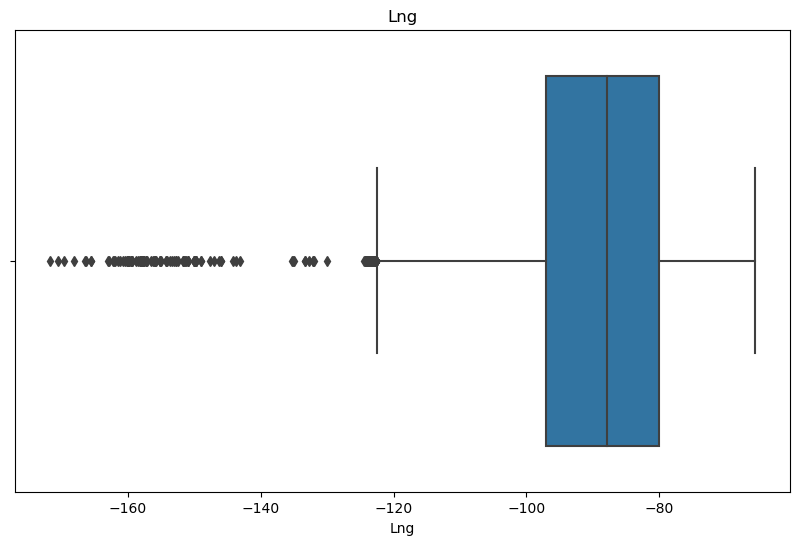

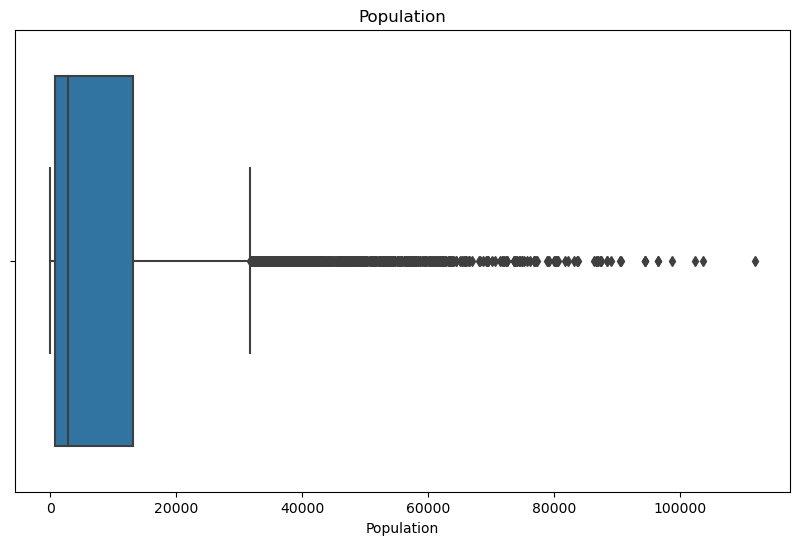

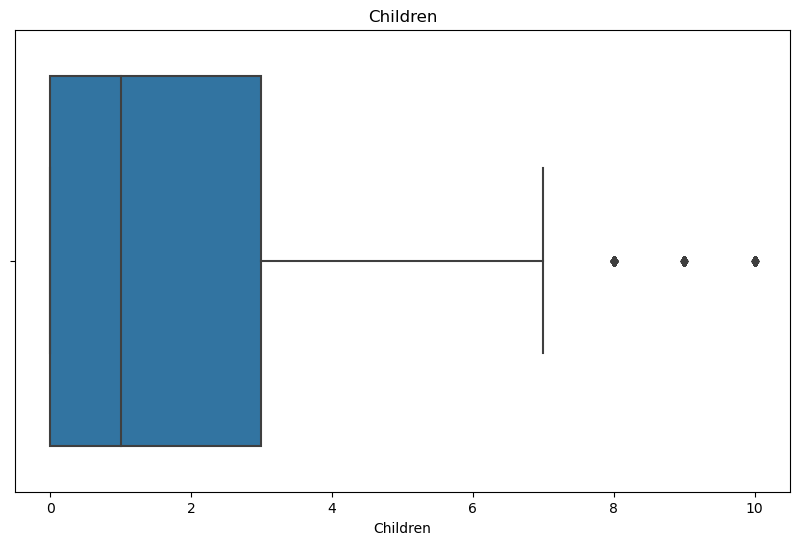

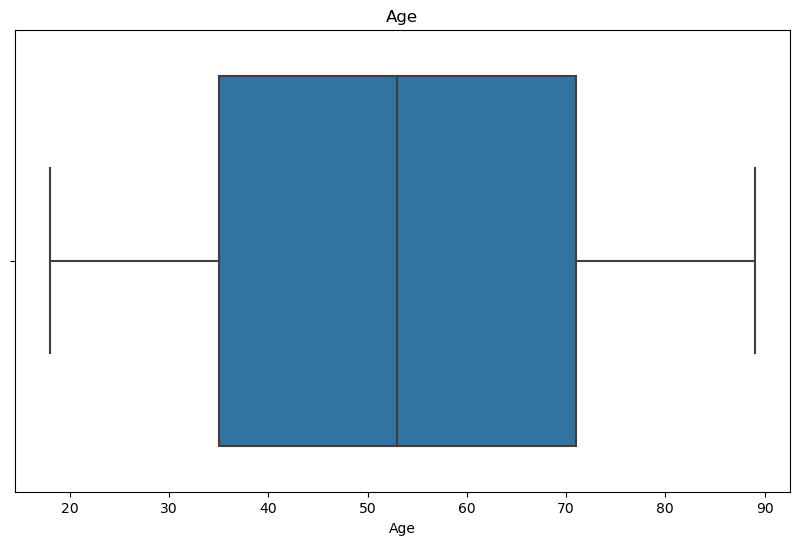

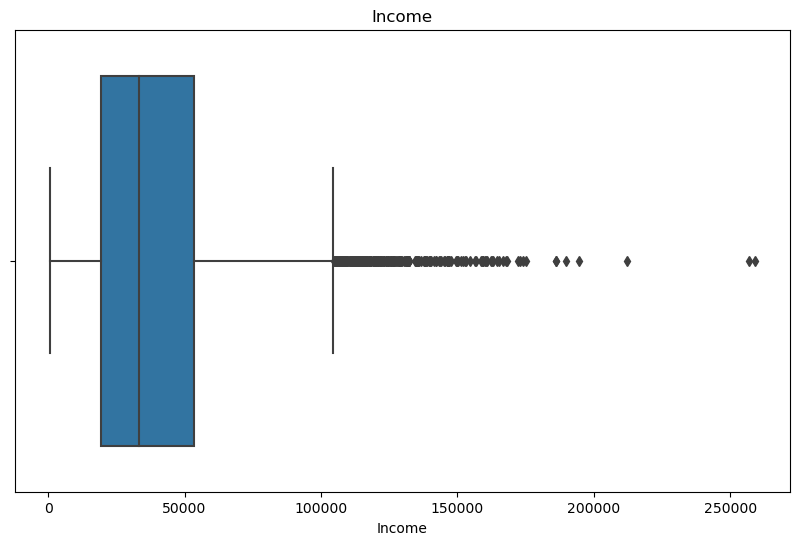

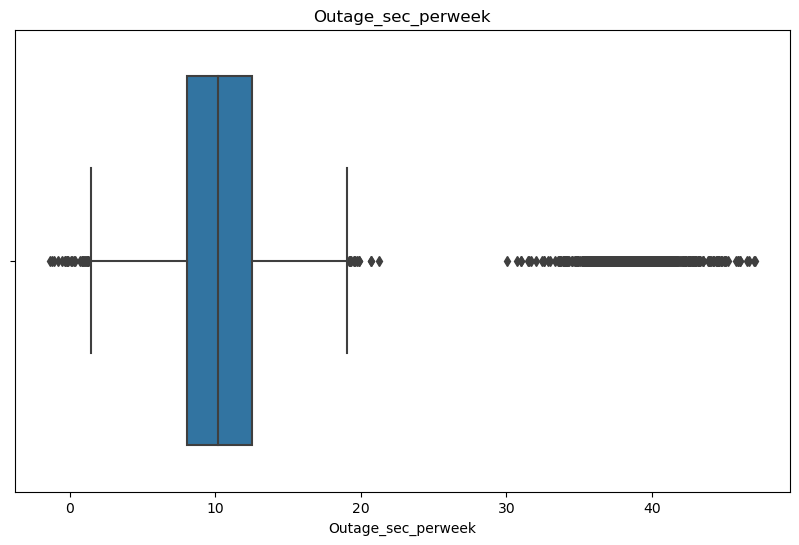

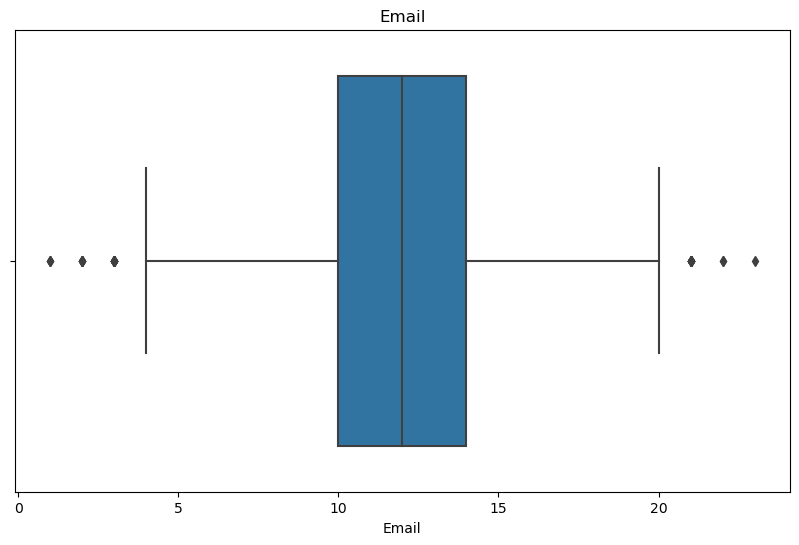

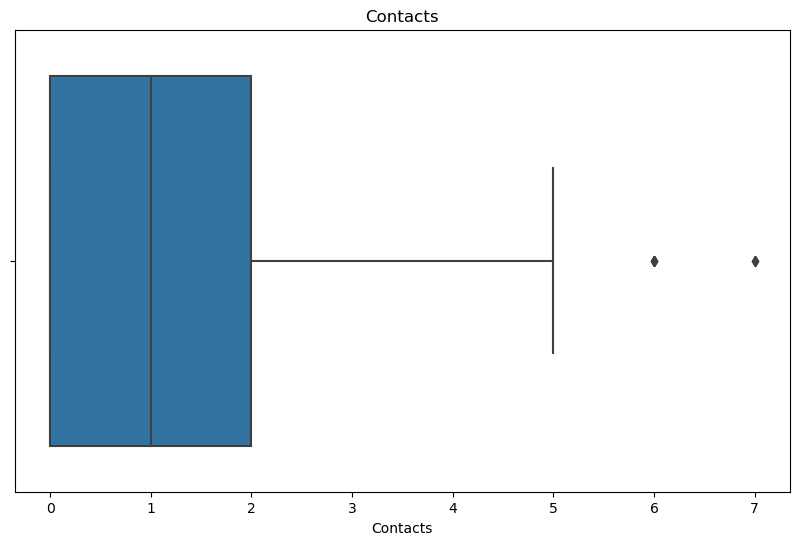

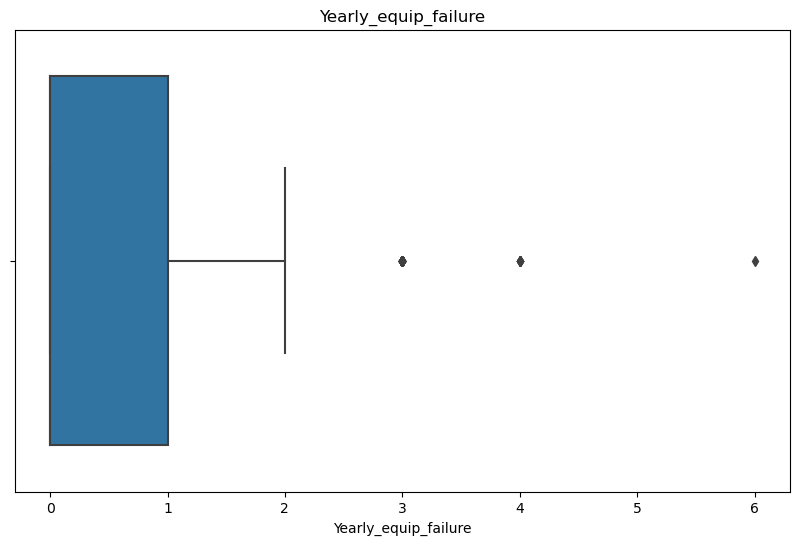

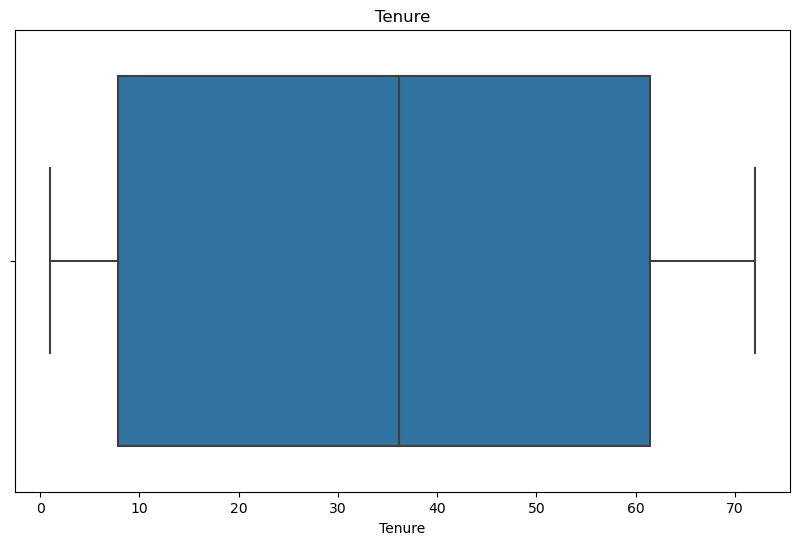

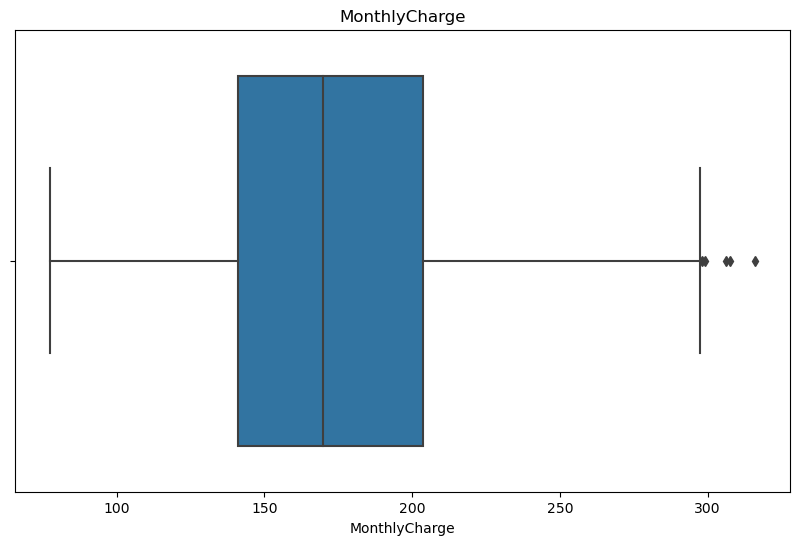

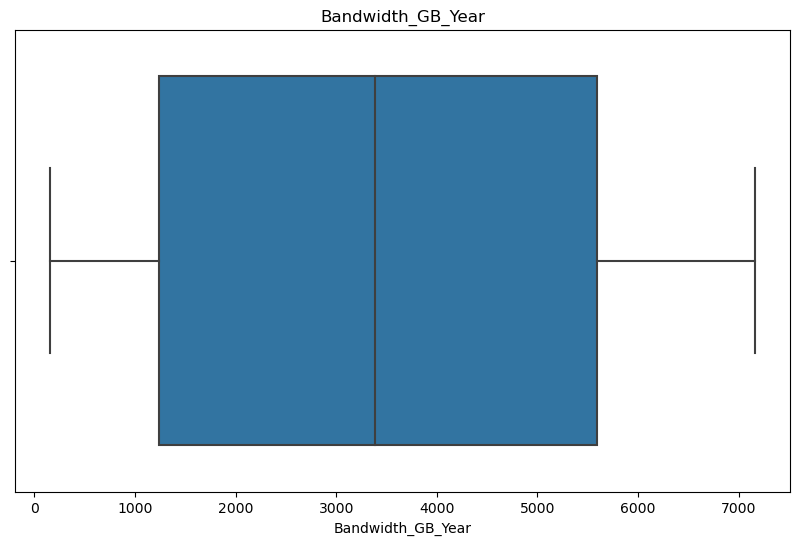

In [12]:
# Create boxplots to visualize outliers in columns.
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
    plt.show()

In [13]:
# Renaming item columns.
rename_columns = {
    'item1': 'Timely response',
    'item2': 'Timely fixes',
    'item3': 'Timely replacements',
    'item4': 'Reliability',
    'item5': 'Options',
    'item6': 'Respectful response',
    'item7': 'Courteous exchange',
    'item8': 'Evidence of active listening'
}

df.rename(columns=rename_columns, inplace=True)


# Fill missing values with mean for numerical columns and mode for categorical columns.
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)
    
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)


# Function to replace outliers with the median.
def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the median value.
    median_value = df[column].median()
    
    # Replace outliers with median.
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])


# Apply the function to all numerical columns.
numerical_columns = df.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    replace_outliers(df, col)

In [14]:
# Round numerical values 
df = df.round(2)

# Final look before saving to csv.
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,1,k409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,point baker,ak,prince of wales-hyder,99927,39.40,-87.92,38.0,...,171.45,904.54,5,5,5,3,4,4,3,4
1,2,s120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,west branch,mi,ogemaw,48661,44.33,-84.24,10446.0,...,242.95,800.98,3,4,3,3,4,3,4,4
2,3,k191035,344d114c-3736-4be5-98f7-c72c281e2d35,yamhill,or,yamhill,97148,45.36,-87.92,3735.0,...,159.44,2054.71,4,4,2,4,4,3,3,3
3,4,d90850,abfa2b40-2d43-4994-b15a-989b8c79e311,del mar,ca,san diego,92014,32.97,-117.25,13863.0,...,120.25,2164.58,4,4,4,2,5,4,3,3
4,5,k662701,68a861fd-0d20-4e51-a587-8a90407ee574,needville,tx,fort bend,77461,29.38,-95.81,11352.0,...,150.76,271.49,4,4,4,3,4,4,4,5


In [15]:
# Create a variable for the cleaned data and save file to csv. 
d206_cleaned_data = 'd206_cleaned_data.csv'
df.to_csv(d206_cleaned_data, index=False)

## PCA

In [16]:
# Separate numeric and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Impute missing values
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Select only numerical columns for PCA
numerical_data = df[numerical_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Get the loading matrix
loading_matrix = pd.DataFrame(pca.components_.T, index=numerical_columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Loading Matrix with All Features:")
print(loading_matrix)

# Identify churn-related features
churn_related_features = [col for col in df.columns if 'Churn' in col.lower()]

# Check if churn-related features are correctly identified
print("Churn-related features: ", churn_related_features)

if churn_related_features:
    # Extract the loadings for churn-related features
    churn_loadings = loading_matrix.loc[churn_related_features]

    # Identify the principal components related to churn by checking high loadings
    # Threshold set at 5 to select significant components
    significant_components = churn_loadings.abs().mean().nlargest(5).index

    # Display the identified principal components related to churn
    print("Principal Components related to Churn:")
    print(significant_components)
else:
    print("No churn-related features found.")

Loading Matrix with All Features:
                           PC1       PC2       PC3       PC4       PC5  \
Lat                  -0.015301 -0.690098  0.214076 -0.111239  0.160128   
Lng                  -0.002490 -0.067287  0.682781 -0.449574 -0.085483   
Population            0.000741  0.639459  0.322217 -0.171705 -0.194405   
Children             -0.006154 -0.158764  0.131704  0.060256 -0.327535   
Age                  -0.012007  0.060321  0.048605  0.051025  0.495427   
Income                0.006313 -0.189980  0.181628 -0.044985 -0.055585   
Outage_sec_perweek    0.017008  0.025117  0.308293  0.598054  0.085294   
Email                -0.017612  0.153678 -0.131501 -0.112930  0.355816   
Contacts              0.003770  0.075071  0.156174  0.066870  0.564325   
Yearly_equip_failure  0.007390 -0.091612 -0.043678  0.424311 -0.338816   
Tenure                0.705018 -0.008094 -0.033793 -0.047267  0.016022   
MonthlyCharge         0.045520  0.083581  0.437815  0.436550  0.077638   
Band

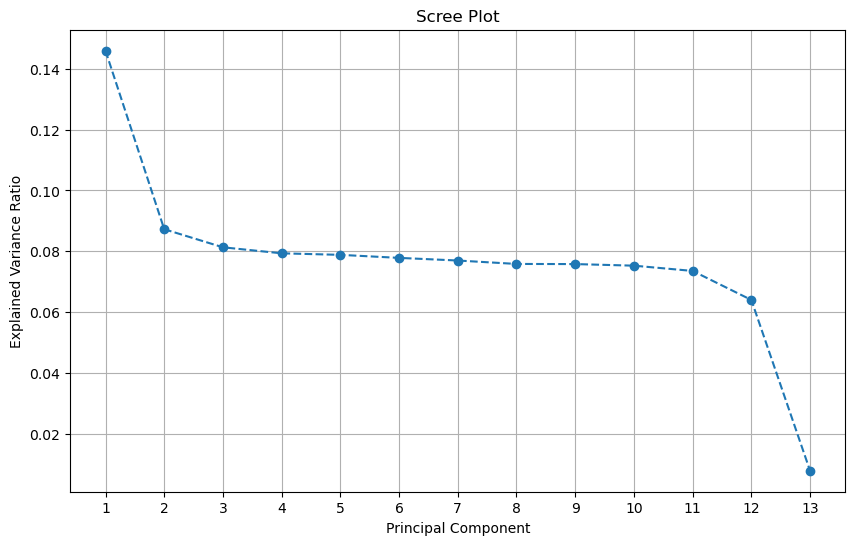

In [17]:
# Explained varience scree plot
explained_variance = pca.explained_variance_ratio_

#Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()


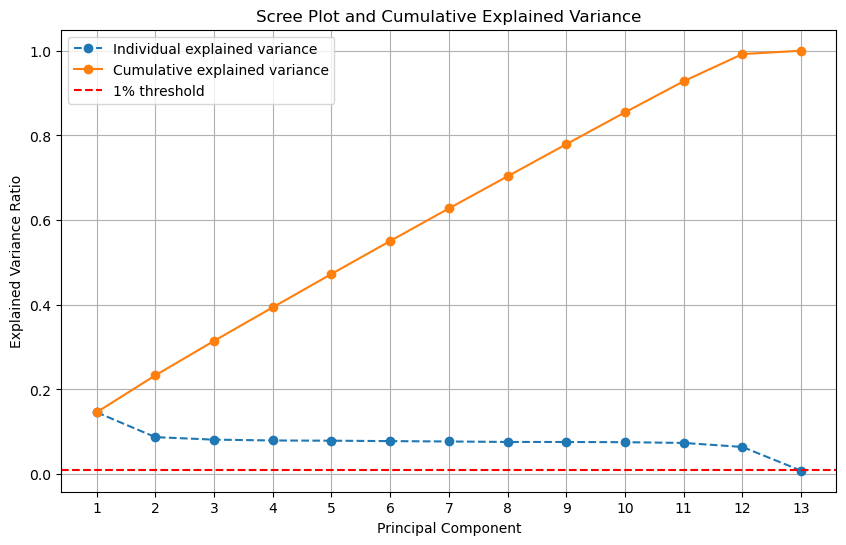

Explained variance ratio for each component:
PC1: 0.1459
PC2: 0.0873
PC3: 0.0813
PC4: 0.0793
PC5: 0.0788
PC6: 0.0778
PC7: 0.0770
PC8: 0.0759
PC9: 0.0758
PC10: 0.0753
PC11: 0.0736
PC12: 0.0640
PC13: 0.0079

Cumulative explained variance ratio:
PC1: 0.1459
PC2: 0.2332
PC3: 0.3145
PC4: 0.3939
PC5: 0.4727
PC6: 0.5506
PC7: 0.6275
PC8: 0.7034
PC9: 0.7792
PC10: 0.8545
PC11: 0.9281
PC12: 0.9921
PC13: 1.0000


In [18]:
# Take a look at cumulative and individual explained variance
# Explained variance
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Scree plot with cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Individual explained variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative explained variance')
plt.axhline(y=0.01, color='r', linestyle='--', label='1% threshold')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid()
plt.show()

# Print explained variance for each component
print("Explained variance ratio for each component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"PC{i}: {variance:.4f}")

# Print cumulative explained variance
print("\nCumulative explained variance ratio:")
for i, cumulative_variance in enumerate(cumulative_explained_variance, start=1):
    print(f"PC{i}: {cumulative_variance:.4f}")